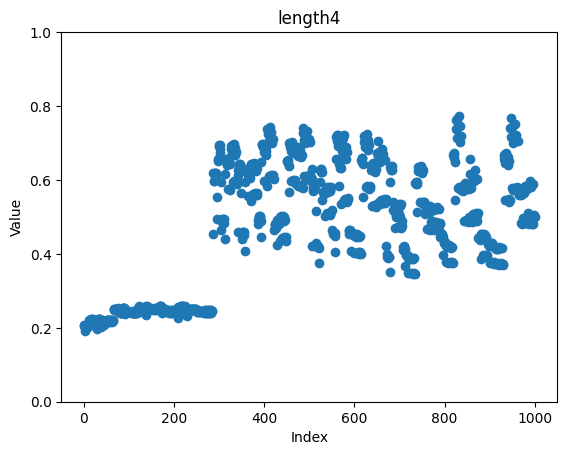

[('[0 1 2]', 0.20589592417213712),
 ('[0 1 6]', 0.2113649491977186),
 ('[ 0  1 12]', 0.21650893855838751),
 ('[0 1 7]', 0.21838480949320074),
 ('[ 0  2 12]', 0.23932629603083908),
 ('[ 0  5 13]', 0.24120519310688796),
 ('[0 5 6]', 0.2492407463822268),
 ('[ 3  5 13]', 0.3487460138126347),
 ('[ 5 12 13]', 0.3725418494342423),
 ('[ 5 10 13]', 0.3732918010971201),
 ('[ 5  8 13]', 0.37402816074740564),
 ('[ 5  9 13]', 0.37543423381157065),
 ('[ 5 11 13]', 0.3756661406413484),
 ('[ 3  5 12]', 0.3876720342330805),
 ('[ 3  5 10]', 0.3878086313417388),
 ('[3 5 8]', 0.3882099961582238),
 ('[3 5 9]', 0.3892909967131107),
 ('[ 3  5 11]', 0.38946628006337414),
 ('[ 5  8 12]', 0.41438334152244266),
 ('[ 5 10 12]', 0.4147588459259277),
 ('[ 5  9 12]', 0.4158967044599903),
 ('[ 5 11 12]', 0.4160342929705884),
 ('[ 5  8 10]', 0.4165881817804365),
 ('[5 8 9]', 0.41755315091810113),
 ('[ 5  8 11]', 0.41780350794486215),
 ('[ 5  9 10]', 0.4181117300284513),
 ('[ 5 10 11]', 0.41818885288235447),
 ('[ 5  9 

In [20]:
import os
import json
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import pandas as pd
from trans import trans_json_to_dictinary, create_different_len_subset_list, generate_all_subsets
from itertools import combinations
from partial_gradient_square import partial_gradient_square
#threshold = 0.4
feature_num = 14
max_considered_subset_length = 6
index = 1
file_name = f'./instance_{index}_vi_data/instance_{index}_allsubsets_scaled_norm.json'
dict = trans_json_to_dictinary(file_name)
data = create_different_len_subset_list(dict,feature_num=feature_num,non_consider_feature=[])
#print(data)
for i in range(3,4):
    values = list(data[i].values())
    plt.ylim(0,1)
    plt.scatter(range(len(values)), values)
    plt.title(f'length{i+1}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()
filtered_ab_data = []
filtered_data = []
for i in range(max_considered_subset_length):
    filtered_ab_data.append({key: value for key, value in data[i].items() if value <0.57})
    filtered_dict = {}
    for key,value in data[i].items():
        key_list = [int(num) for num in re.findall(r'\d+', key)] 
        count =0 
        flag = True
        partial_gradient_square_sum = sum(partial_gradient_square[index][j] for j in key_list)
        if i!=0:
            subsets= [np.array(subset) for subset in combinations(key_list, i)]
            #print(key_list)
            #print(subsets)
            for subset in subsets:
                partial_gradient_square_subset_sum = sum(partial_gradient_square[index][k] for k in subset)
                #weight = (partial_gradient_square_subset_sum/partial_gradient_square_sum)**0.5 
                weight = 1
                #print(weight)
                if value > dict[str(subset)]*weight:
                    flag = False
                    #filtered_dict[key] =  value
                    #print(str(subset))
            if flag:
                filtered_dict[key] = value
    filtered_data.append(filtered_dict)    
#print(filtered_ab_data[1])
sorted_dict = sorted(filtered_data[2].items(), key=lambda x: x[1])
a = []
for feature in range(feature_num):
    count = 0
    for key, value in sorted_dict:
        key_list = [int(num) for num in re.findall(r'\d+', key)] 
        if feature in key_list:
            feature_idx = key_list.index(feature)
            next = (feature_idx+1)%len(key_list)
            output  = tuple([feature] + key_list[:feature_idx] + key_list[feature_idx+1:])
            a.append(output)
            count += 1
        if count==3:
            break
sorted_dict

將subset_len = 3 的資料進行畫圖

In [26]:
import os
import json
from trans import trans_json_to_dictinary, create_different_len_subset_list, generate_all_subsets
feature_num = 14
subset_length = 4
index_list = [i for i in range(1,11)]
len_data = []
subset_dict = {}
subset_sorted_dict = {}
for index in index_list:
    file_name = f'./instance_{index}_vi_data/instance_{index}_allsubsets_scaled_norm.json'
    dict = trans_json_to_dictinary(file_name)
    data = create_different_len_subset_list(dict,feature_num=feature_num,non_consider_feature=[])
    subset_dict[f'instance_{index}'] = data[subset_length-1]        #找到每個instance的data
    sorted_dict = sorted(data[subset_length-1].items(), key=lambda x: x[1])       #每個特徵排序         
    subset_sorted_dict[f'instance_{index}'] = sorted_dict[:20]       
    print(f'instance_{index}: ',subset_sorted_dict[f'instance_{index}'])         
    value = list(data[subset_length-1].values())        #用來畫圖
    len_data.append(value)      #紀錄每個instance
with open(f'len{subset_length}_絕對排序.json', 'w') as json_file:
    json.dump(subset_sorted_dict, json_file)


instance_1:  [('[0 1 2 6]', 0.19051122955739133), ('[0 1 5 6]', 0.19615599882436766), ('[ 0  1  5 13]', 0.20106024124402397), ('[ 0  1  2 12]', 0.20291846138901537), ('[0 1 6 7]', 0.20410151039723426), ('[0 1 2 7]', 0.2047187028331852), ('[ 0  1  2 11]', 0.20589602829264028), ('[0 1 2 9]', 0.20602398864244492), ('[0 1 2 4]', 0.20605727703281077), ('[0 1 2 8]', 0.20638980483099573), ('[ 0  1  2 10]', 0.20648013616961897), ('[ 0  1  6 12]', 0.20725359452923442), ('[ 0  1  2 13]', 0.2079493141626959), ('[0 1 2 5]', 0.20804617062550618), ('[0 1 2 3]', 0.20827598049952417), ('[ 0  1  6 13]', 0.20828554120769469), ('[0 1 4 6]', 0.21078297686125824), ('[ 0  1  6 11]', 0.21136503846143903), ('[0 1 6 9]', 0.2114742815311555), ('[0 1 3 5]', 0.21174368368787044)]
instance_2:  [('[ 0  1  5 13]', 0.18181994085982683), ('[0 1 5 6]', 0.19108635449099923), ('[ 0  1  6 13]', 0.2083791412831043), ('[0 1 4 5]', 0.21304346794786377), ('[0 1 3 5]', 0.21330284577286696), ('[0 1 2 5]', 0.21441165083378058), 

/tmp/ipykernel_986403/3249190689.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 10)


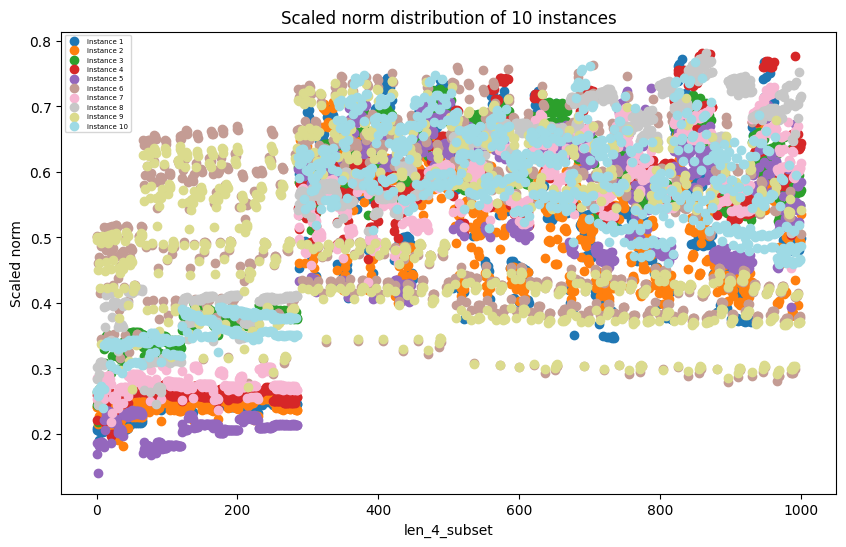

In [22]:
colors = plt.cm.get_cmap('tab20', 10)
plt.figure(figsize=(10, 6))
for i, values in enumerate(len_data):
    plt.scatter(range(len(values)), values, color=colors(i), label=f'instance {i+1}')


plt.legend(fontsize='5')

#標題座標
plt.title('Scaled norm distribution of 10 instances')
plt.xlabel(f'len_{subset_length}_subset')
plt.ylabel('Scaled norm')
#展示圖
plt.show()

In [23]:
import json

with open('data.json', 'w') as json_file:
    json.dump(data, json_file)